#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` — порядковый номер записи в датасете.
* `Name` — наименование игры.
* `Platform` — платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и другие).
* `Year` — год выпуска игры.
* `Genre` — жанр игры.
* `Publisher` — наименование компании-издателя игры.
* `NA_Sales` — объём продаж игры в Северной Америке, млн копий.
* `EU_Sales` — объём продаж игры в Европе, млн копий.
* `JP_Sales` — объём продаж игры в Японии, млн копий.
* `Other_Sales` — объём продаж игры в остальных странах, млн копий.
* `Global_Sales` — объём продаж игры по всему миру, млн копий.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### Загрузка данных

In [46]:
df = pd.read_csv('vgsales.csv')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###  Линейный график динамики объёма продаж всех игр жанра «Sports» в Японии.

In [87]:
DF_SportsJP = df[df['Genre'] == 'Sports'][['Year','JP_Sales','Genre']]
DF_SportsJP.head()

,Year,JP_Sales,Genre
0,2006.0,3.77,Sports
3,2009.0,3.28,Sports
13,2007.0,3.60,Sports
14,2009.0,2.53,Sports
77,2015.0,0.06,Sports


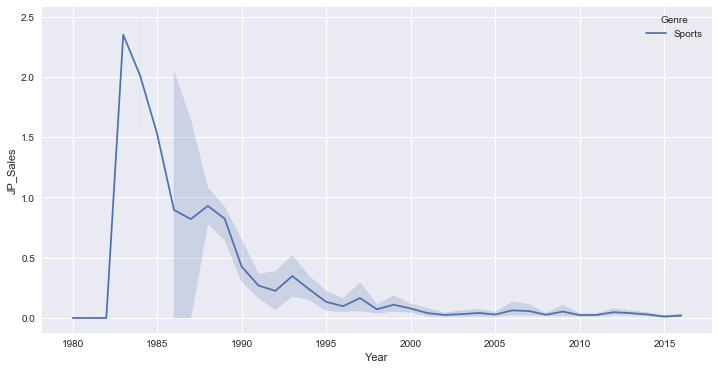

In [88]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=DF_SportsJP, x= 'Year', y='JP_Sales',hue = 'Genre', ax=ax)

###  Графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

In [30]:
data_Act = pd.melt(df, id_vars=['Publisher','Year'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Global_Sales'],var_name='County_sales', value_name='Sales_volume')

In [31]:
data_Act = data_Act[(data_Act['Publisher'] == "Activision")]

Text(0, 0.5, 'Продажи, млн.копий')

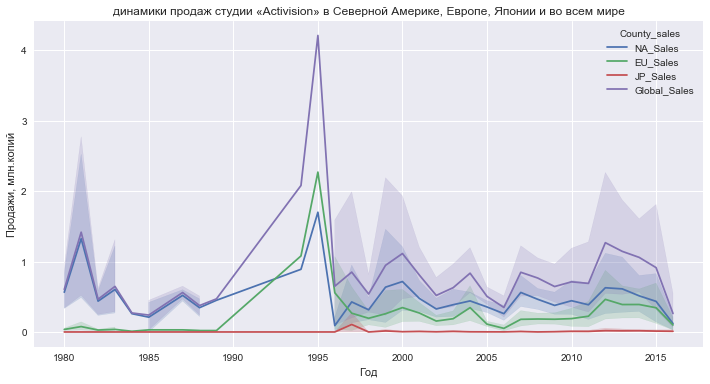

In [89]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data_Act, x= 'Year', y='Sales_volume',hue = 'County_sales', ax=ax)
ax.set_title('динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн.копий')

### Линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

In [84]:
data_act = df[(df['Publisher'] == "Activision")]

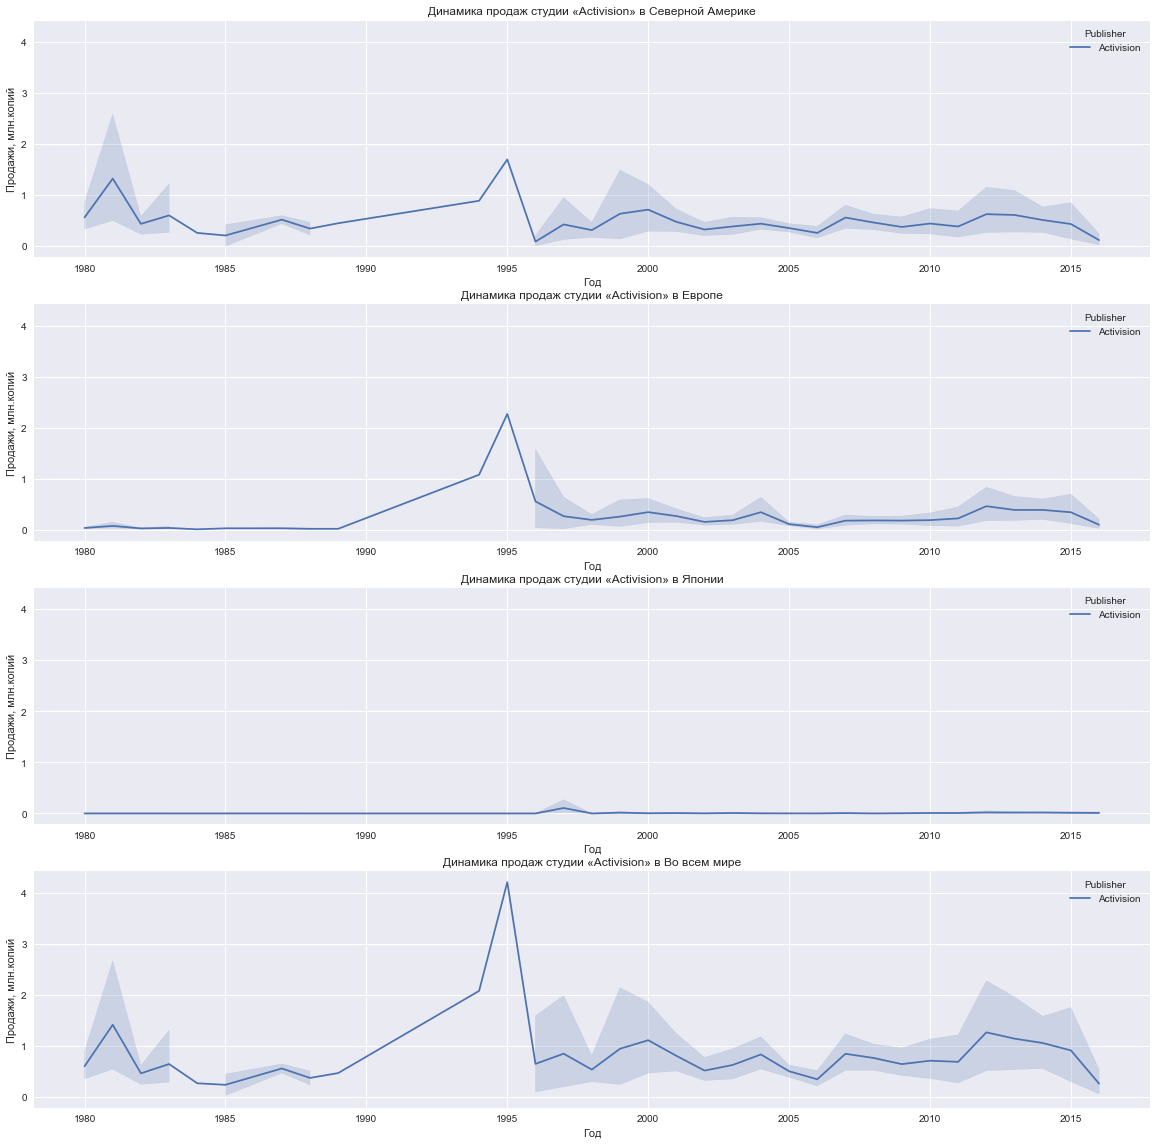

In [90]:
value_vars=['NA_Sales','EU_Sales','JP_Sales','Global_Sales']
title = ["Северной Америке", "Европе", 'Японии', 'Bо всем мире']
fig, axes = plt.subplots(figsize=(20,20),nrows=4, sharey = True)

for i in range(0,4):
        ax = axes[i]
        data_act = df[(df['Publisher'] == "Activision")][['Year',str(value_vars[i]),'Publisher']]
        sns.lineplot(data=data_act, x= 'Year',y =str(value_vars[i]), hue = 'Publisher',ax= ax)
        ax.set_title('Динамика продаж студии «Activision» в ' + title[i])
        ax.set_xlabel('Год')
        ax.set_ylabel('Продажи, млн.копий')

            
            
plt.show()        

###  Гистограммы распредения мировых продаж игр издателей «Microsoft Game Studios» и «Take-Two Interactive» после 2010 года (включая 2010 год). 

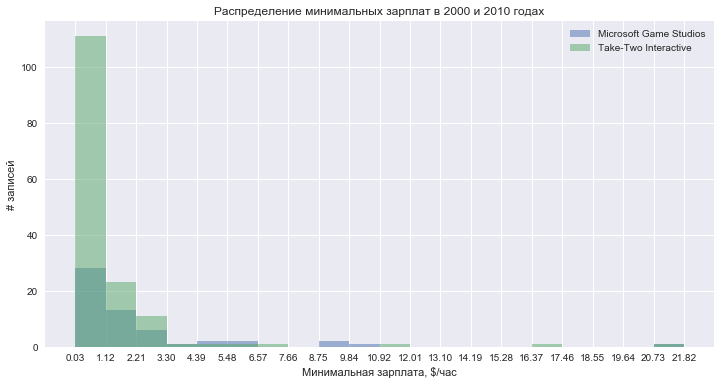

In [111]:
data = df[(df['Year'] >= 2010) & (df['Publisher'] == 'Take-Two Interactive')]['Global_Sales']
data1 = df[(df['Year'] >= 2010) & (df['Publisher']=='Microsoft Game Studios')]['Global_Sales']
                                  
                                                                
fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data1, label='Microsoft Game Studios', alpha=0.5, bins=20)
ax.hist(data, label='Take-Two Interactive', alpha=0.5, bins=bins)

ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(list(bins))
ax.legend()

plt.show()

### Линейный график динамики количества игр, выпускаемых Nintendo, по годам.

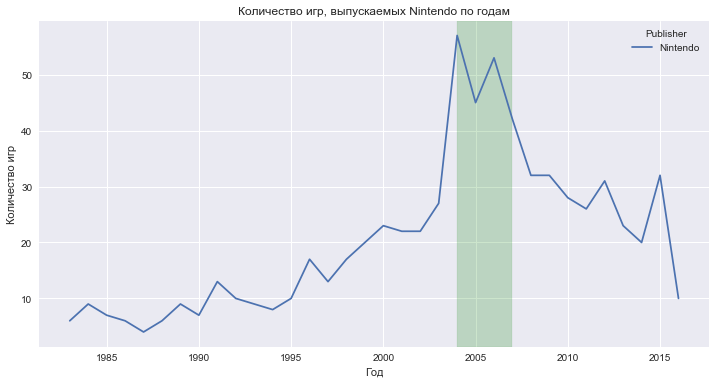

In [36]:
df_nin = df[(df['Publisher'] == 'Nintendo')][['Publisher','Year','Name']].groupby('Year').count()
df_nin['Publisher'] = 'Nintendo'
df_nin.index = df_nin.index.astype(int)
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df_nin, x= df_nin.index, y='Name', hue = 'Publisher', ax = ax)
ax.axvspan(xmin=df_nin[(df_nin['Name'] >= 35)].index.min(), xmax=df_nin[(df_nin['Name'] >= 35)].index.max(), color='green', alpha=0.2) 

ax.set_title('Количество игр, выпускаемых Nintendo по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')


plt.show()

### Зависимость продаж во всем мире от продаж в Северной Америке

Определены 3 жанра и 4 платформы с самыми большими продажами игр в мире за всё время. 
Построена сетка графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанра, платформы). 

In [3]:
df_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
df_genre = df_genre.loc[0:2]
df_genre

,Genre,Global_Sales
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37


In [4]:
df_pltf = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
df_pltf = df_pltf.loc[0:3]
df_pltf

,Platform,Global_Sales
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71


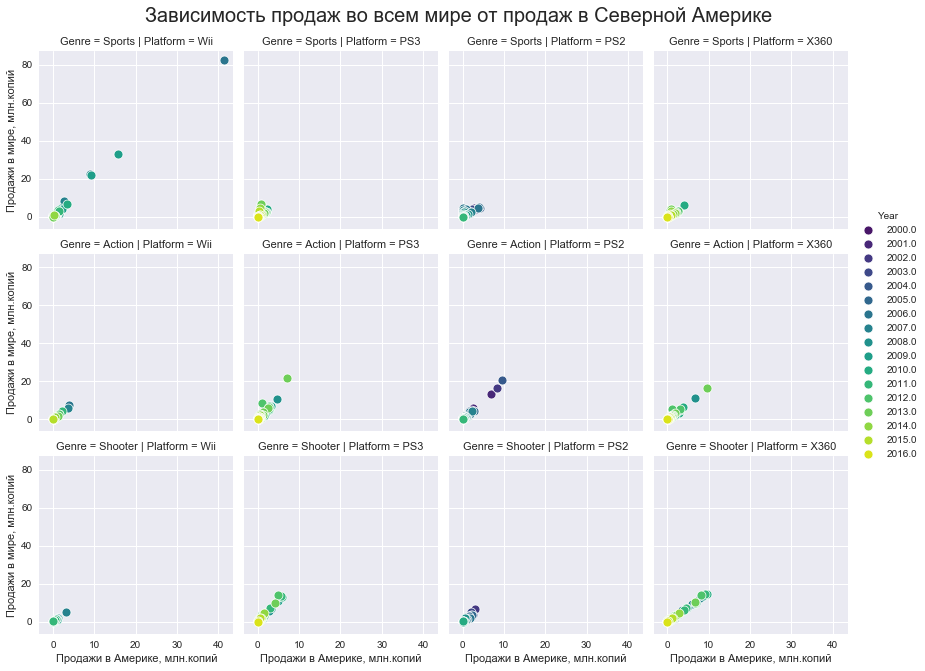

In [145]:
Platform = ['PS2','X360','PS3','Wii']
Genre = ['Action','Sports','Shooter']
data_GS = df.loc[(df['Platform'].isin(Platform)) & (df['Genre'].isin(Genre))][['Global_Sales','NA_Sales','Name','Platform','Genre','Year']]
g = sns.FacetGrid(data=data_GS, col= 'Platform' , row= 'Genre',hue ='Year',palette = "viridis")

g.map(sns.scatterplot, 'NA_Sales','Global_Sales', s=80, alpha=1);          
      
g.set_axis_labels("Продажи в Америке, млн.копий","Продажи в мире, млн.копий");
g.fig.suptitle("Зависимость продаж во всем мире от продаж в Северной Америке", y = 1.03, fontsize = 20);
g.add_legend()           
            
plt.show() 

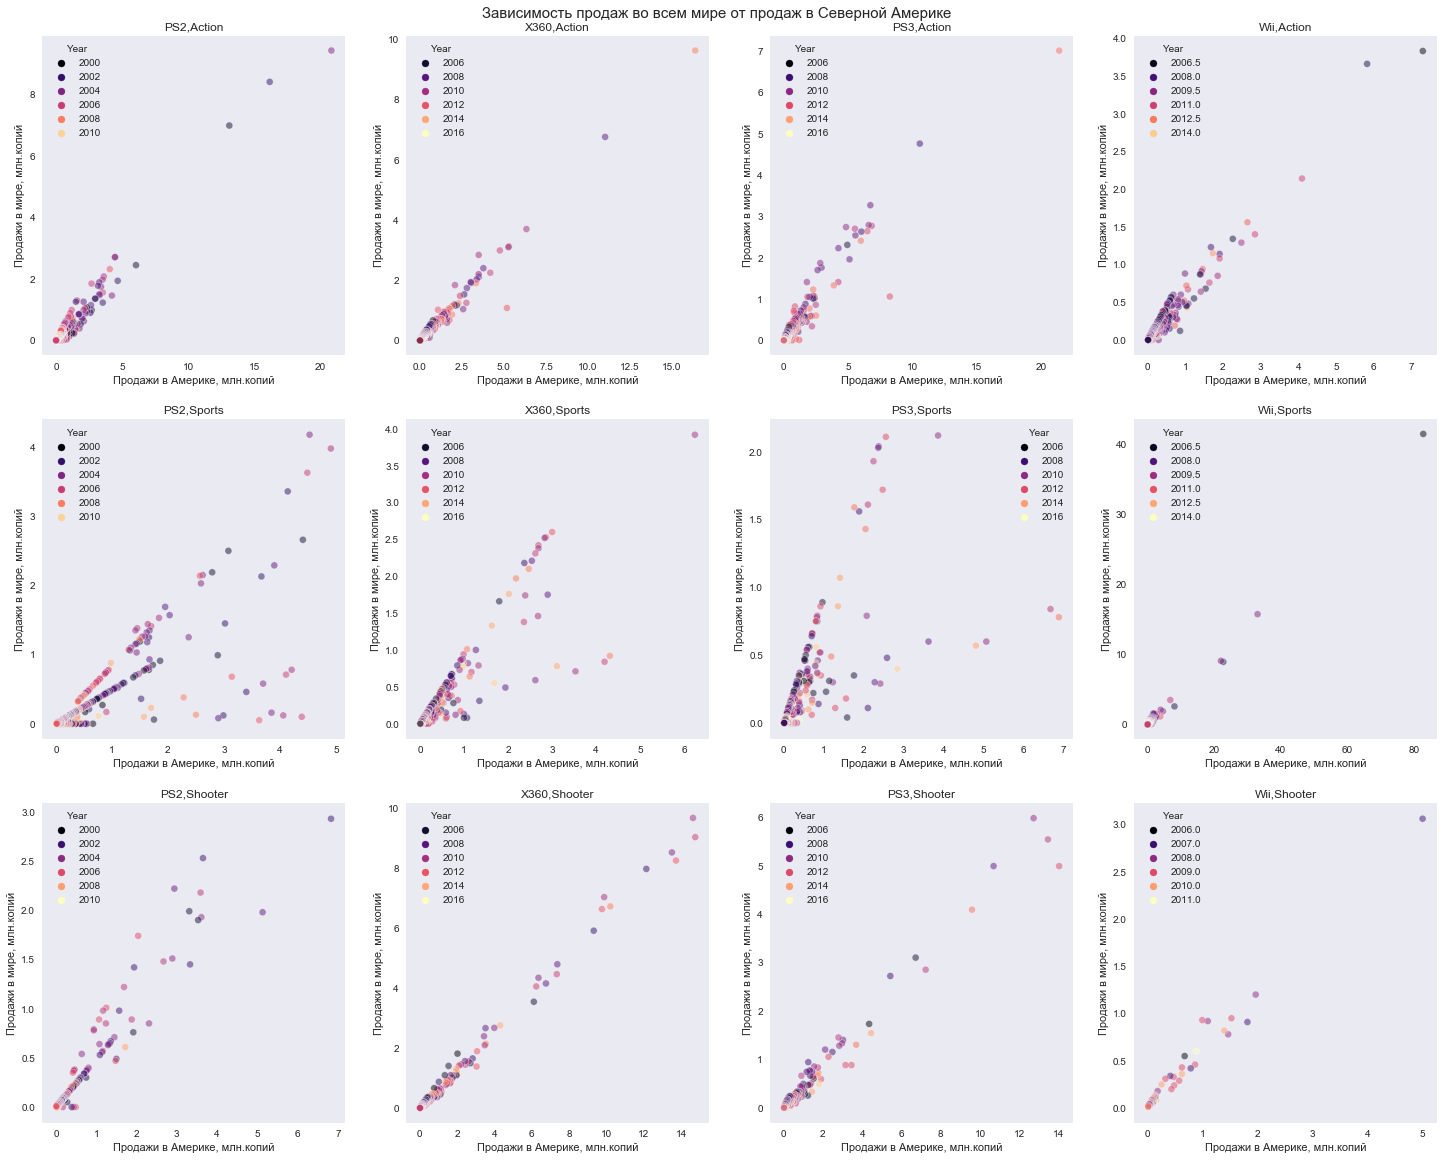

In [104]:
ncols = 4
nrows = 3
fig, axes = plt.subplots(figsize=(25,20), ncols = ncols, nrows = nrows)
Platform = df_pltf['Platform']
Genre = df_genre['Genre']

for i in range(ncols):
    for j in range(nrows):
            ax = axes[j][i]
            data_GS = df[(df['Platform'] ==  df_pltf['Platform'][i]) &(df['Genre'] == df_genre['Genre'][j])][['Global_Sales','NA_Sales','Name', "Year",'Genre','Platform']]
            
            sns.scatterplot(data=data_GS, x= 'Global_Sales', y='NA_Sales',ax = ax, alpha=0.5,hue="Year",palette="magma")
            #sns.scatterplot(data_GS, data_NA,label=f'{Platform[i]},{Genre[j]}')
            ax.set_xlabel("Продажи в Америке, млн.копий")
            ax.set_ylabel("Продажи в мире, млн.копий")
            ax.grid()
            ax.set_title(f'{Platform[i]},{Genre[j]}')
            
fig.suptitle("Зависимость продаж во всем мире от продаж в Северной Америке" ,y = 0.9, fontsize = 15) 

plt.show()            

